In [1]:
from aqua.graphics import plot_hovmoller
from teleconnections import mjo_hovmoller
from aqua import Reader

In [2]:
%reload_ext autoreload
%autoreload 2

MJO is a teleconnection that require daily aggregated data.
We specify the teleconnection name and the model/exp/source to analyze.

In [3]:
from aqua import inspect_catalogue

inspect_catalogue(model='ERA5', exp='era5')

Sources available in catalogue for model ERA5 and exp era5:


['monthly', 'daily', 'hourly']

In [4]:
telecname = 'MJO'

model = 'ERA5'
exp = 'era5'
source = 'daily'

The Reader class is user to retrieve the data, with standard resolution `r025` and the `daily` frequency.

In [5]:
reader = Reader(model=model,exp=exp,source=source, regrid='r025')
data = reader.retrieve()

2024-03-27 13:12:44 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets


2024-03-27 13:12:50 :: Reader :: ERROR    -> Variable time_bnds has no units!


In order to plot the data we subselect a time slice of data, then we use the `Reader` methods to obtain the correctly formatted data for the plot

In [6]:
sel = {'time': slice('2021-01-01','2021-06-30')}

data_sel = data.sel(**sel)
data_sel = reader.timmean(data_sel, freq='daily')
data_sel = reader.regrid(data_sel)

Finally the data are smoothed with a 5 days rolling window, selecting the correct variable and ready to be plotted.

In [10]:
data_smooth = mjo_hovmoller(data_sel, telecname=telecname, loglevel='DEBUG')

2024-03-27 13:23:18 :: MJO :: INFO     -> No namelist provided. Trying to load default namelist.
2024-03-27 13:23:18 :: MJO :: INFO     -> Subselecting var mtntrf
2024-03-27 13:23:18 :: MJO :: INFO     -> Subselecting var mtntrf


To plot we use the `hovmoller_plot` function from the module

2024-03-27 13:23:54 :: Hovmoller :: INFO     -> Averaging over dimension: lat


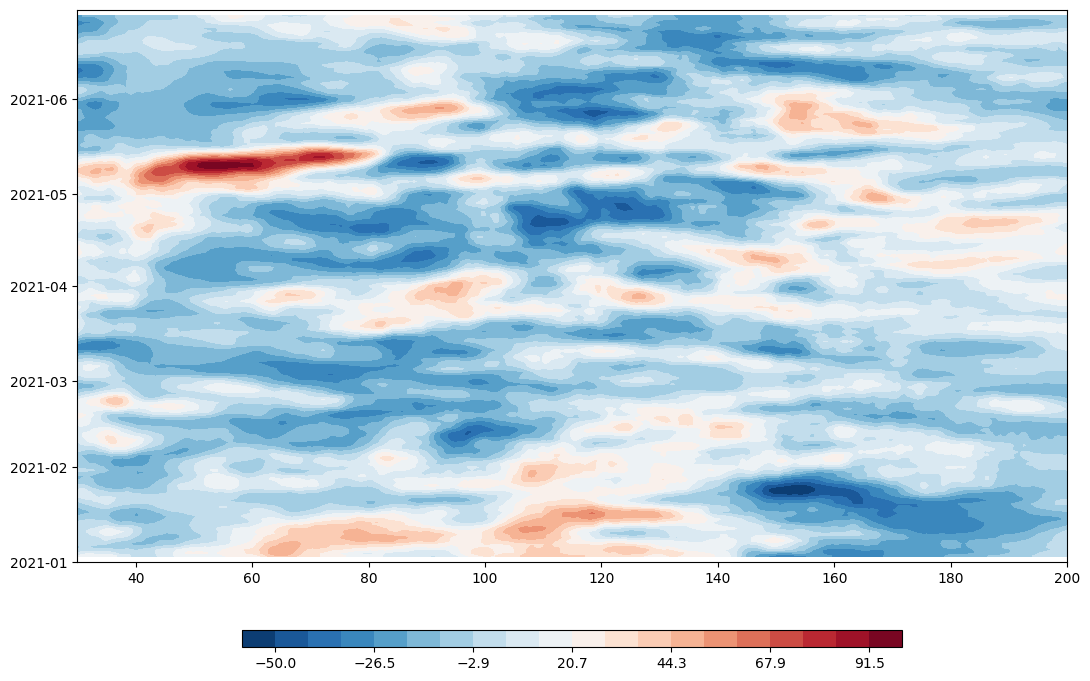

In [11]:
plot_hovmoller(data_smooth, dim='lat', invert_axis=True, nlevels=21, loglevel='INFO')

From the sate Dataset we can smooth and plot another variable, overwriting the default variable from the MJO namelist.